<a href="https://colab.research.google.com/github/trungleminh2909/GPU_Analysis/blob/main/GPU_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)

In [ ]:
data <- read.csv("/content/All_GPUs.csv")

The GPU dataset from: https://www.kaggle.com/datasets/iliassekkaf/computerparts?resource=downlo

In [ ]:
summary(data)

 Architecture       Best_Resolution    Boost_Clock         Core_Speed       
 Length:3406        Length:3406        Length:3406        Length:3406       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 DVI_Connection   Dedicated           Direct_X         DisplayPort_Connection
 Min.   :0.000   Length:3406        Length:3406        Min.   :0.000         
 1st Qu.:1.000   Class :character   Class :character   1st Qu.:1.000         
 Median :1.000   Mode  :character   Mode  :character   Median :1.000         
 Mean   :1.356                                         Mean   :1.613    

In [ ]:
#Missing data count step
# Drop irrelevant attribute: Architecture, Manufacturer, Name, Power_Connector,
data$Best_Resolution <- ifelse(!grepl("x", data$Best_Resolution), NA, data$Best_Resolution)
data$Boost_Clock <- ifelse(!grepl("MHz", data$Boost_Clock), NA, data$Boost_Clock)
data$Core_Speed <- ifelse(!grepl("MHz", data$Core_Speed), NA, data$Core_Speed)
data$Dedicated <- ifelse(data$Dedicated == "Yes", 1, ifelse(data$Dedicated == "No", 0, NA))
data$Direct_X <- ifelse(!grepl("DX", data$Direct_X), NA, data$Direct_X)
data$Integrated <- ifelse(data$Integrated == "Yes", 1, ifelse(data$Integrated == "No", 0, NA))
data$L2_Cache <- ifelse(!grepl("KB", data$L2_Cache), NA, data$L2_Cache)
data$Max_Power <- ifelse(!grepl("Watt", data$Max_Power), NA, data$Max_Power)
data$Memory <- ifelse(!grepl("MB", data$Memory), NA, data$Memory)
data$Memory_Bandwidth <- ifelse(!grepl("GB", data$Memory_Bandwidth), NA, data$Memory_Bandwidth)
data$Memory_Bus <- ifelse(!grepl("Bit", data$Memory_Bus), NA, data$Memory_Bus)
data$Memory_Speed <- ifelse(!grepl("MHz", data$Memory_Speed), NA, data$Memory_Speed)
data$Memory_Type <- ifelse(!grepl("DDR", data$Memory_Type), NA, data$Memory_Type)
data$Notebook_GPU <- ifelse(data$Notebook_GPU == "Yes", 1, ifelse(data$Notebook_GPU == "No", 0, NA))
data$PSU <- ifelse(!grepl("Watt", data$PSU), NA, data$PSU)
data$Pixel_Rate <- ifelse(!grepl("Pixel", data$Pixel_Rate), NA, data$Pixel_Rate)
data$Process <- ifelse(!grepl("nm", data$Process), NA, data$Process)
data$ROPs[data$ROPs == ""] <- NA
data$Shader[data$Shader == ""] <- NA
data$TMUs[data$TMUs == ""] <- NA
data$VGA_Connection[data$VGA_Connection == ""] <- NA
data$Release_Date <- ifelse(!grepl("-", data$Release_Date), NA, data$Release_Date)
data$Release_Price <- ifelse(!grepl(".", data$Release_Price), NA, data$Release_Price)
data$Resolution_WxH <- ifelse(!grepl("x", data$Resolution_WxH), NA, data$Resolution_WxH)
data$SLI_Crossfire <- ifelse(data$SLI_Crossfire == "Yes", 1, ifelse(data$SLI_Crossfire == "No", 0, NA))
data$Texture_Rate <- ifelse(!grepl("Texel", data$Texture_Rate), NA, data$Texture_Rate)

# Count the number of missing values in each column
missing_values <- colSums(is.na(data))

# Calculate the percentage of missing values
percentage_missing <- (missing_values / nrow(data)) * 100


In [ ]:
# Print the columns with missing values and their respective percentages
cat("Columns with missing values and their respective percentages:\n")
for (column in names(data)) {
  if (missing_values[column] > 0) {
    cat("Column:", column, " - Missing Percentage:", percentage_missing[column], "%\n")
  }
}

Columns with missing values and their respective percentages:
Column: Best_Resolution  - Missing Percentage: 18.84909 %
Column: Boost_Clock  - Missing Percentage: 57.54551 %
Column: Core_Speed  - Missing Percentage: 27.48092 %
Column: DVI_Connection  - Missing Percentage: 22.01996 %
Column: Dedicated  - Missing Percentage: 0.4110393 %
Column: Direct_X  - Missing Percentage: 0.1761597 %
Column: DisplayPort_Connection  - Missing Percentage: 74.83852 %
Column: HDMI_Connection  - Missing Percentage: 22.40164 %
Column: Integrated  - Missing Percentage: 0.4110393 %
Column: Max_Power  - Missing Percentage: 18.34997 %
Column: Memory  - Missing Percentage: 12.33118 %
Column: Memory_Bandwidth  - Missing Percentage: 3.669994 %
Column: Memory_Bus  - Missing Percentage: 1.820317 %
Column: Memory_Speed  - Missing Percentage: 3.082795 %
Column: Memory_Type  - Missing Percentage: 2.084557 %
Column: Open_GL  - Missing Percentage: 1.174398 %
Column: PSU  - Missing Percentage: 34.49794 %
Column: Pixel_Ra

In [ ]:
# Step 1: remove specified columns to create a modified dataset
data_subset <- data[, !(names(data) %in% c("Architecture", "Manufacturer", "Name", "Power_Connector", "Boost_Clock", "DisplayPort_Connection", "Release_Price"))]

# Step 2: remove rows with null values in specified columns
columns_to_check <- c("Dedicated", "Direct_X", "Integrated", "Memory_Bandwidth", "Memory_Bus", "Memory_Speed", "Memory_Type", "Open_GL", "Release_Date", "Shader", "Resolution_WxH")
data_subset <- data_subset[complete.cases(data_subset[, columns_to_check]), ]

# Export the modified dataset
write.csv(data_subset, file = "modified_dataset.csv", row.names = FALSE)

In [ ]:
install.packages("VIM")
library(VIM)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Read the modified dataset from the CSV file for imputation
modified_dataset <- read.csv("modified_dataset.csv")

In [ ]:
# We take quare root of 3000 which is about 55
imputed_modified_dataset <- kNN(modified_dataset, k = 55)

#Choose necessary columns
imputed_modified_dataset <- imputed_modified_dataset[, c("Best_Resolution", "Core_Speed", "DVI_Connection", "Dedicated", "Direct_X",
                                "HDMI_Connection", "Integrated", "L2_Cache", "Max_Power", "Memory",
                                "Memory_Bandwidth", "Memory_Bus", "Memory_Speed", "Memory_Type", "Notebook_GPU",
                                "Open_GL", "PSU", "Pixel_Rate", "Process", "ROPs", "Release_Date",
                                "Resolution_WxH", "SLI_Crossfire", "Shader", "TMUs", "Texture_Rate",
                                "VGA_Connection")]

# Export the imputed dataset
write.csv(imputed_modified_dataset, file = "imputed_modified_dataset.csv", row.names = FALSE)

In [ ]:
library(dplyr)
library(readr)
library(tidyr)
library(stringr)

In [ ]:
# Load the data
data <- read_csv("imputed_modified_dataset.csv")

# Define a function to multiply resolutions
multiply_resolution <- function(value) {
  if (is.na(value)) {
    return(NA)
  }
  numbers <- as.numeric(str_extract_all(value, "\\d+")[[1]])
  if (length(numbers) == 2) {
    return(numbers[1] * numbers[2])
  } else {
    return(NA)
  }
}

# Define a function to extract numbers (including decimals)
extract_number <- function(value) {
  if (is.na(value)) {
    return(NA)
  }
  number <- str_extract(value, "\\d+\\.?\\d*")  # Modified regex to handle decimals
  if (!is.na(number)) {
    return(as.numeric(number))
  } else {
    return(NA)
  }
}

# Define a function to handle ROPs column
handle_rops <- function(value) {
  if (is.na(value)) {
    return(NA)
  }
  if (grepl("\\(x\\d+\\)", value)) {
    numbers <- as.numeric(str_extract_all(value, "\\d+")[[1]])
    if (length(numbers) == 2) {
      return(numbers[1] * numbers[2])
    } else {
      return(NA)
    }
  } else {
    return(as.numeric(value))
  }
}

# Transform the data
cleaned_dataset <- data %>%
  mutate(
    Best_Resolution = sapply(Best_Resolution, multiply_resolution),
    Core_Speed = sapply(Core_Speed, extract_number),
    L2_Cache = sapply(L2_Cache, extract_number),
    Max_Power = sapply(Max_Power, extract_number),
    Memory = sapply(Memory, extract_number),
    Memory_Bandwidth = sapply(Memory_Bandwidth, extract_number),
    Memory_Bus = sapply(Memory_Bus, extract_number),
    Memory_Speed = sapply(Memory_Speed, extract_number),
    Pixel_Rate = sapply(Pixel_Rate, extract_number),
    Process = sapply(Process, extract_number),
    Resolution_WxH = sapply(Resolution_WxH, multiply_resolution),
    Texture_Rate = sapply(Texture_Rate, extract_number),
    ROPs = sapply(ROPs, handle_rops) # Apply the new function to handle ROPs column
  )

# Write the data back to a CSV
write_csv(cleaned_dataset, "cleaned_dataset.csv")

Rows: 3014 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): Best_Resolution, Core_Speed, Direct_X, L2_Cache, Max_Power, Memory...
dbl (10): DVI_Connection, Dedicated, HDMI_Connection, Integrated, Notebook_G...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# Load necessary libraries
library(ggplot2)

In [ ]:
# Load the cleaned dataset
cleaned_dataset <- read_csv("cleaned_dataset.csv")

Rows: 3014 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Direct_X, Memory_Type, PSU, Release_Date
dbl (23): Best_Resolution, Core_Speed, DVI_Connection, Dedicated, HDMI_Conne...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# Define a function for label encoding
label_encode <- function(column) {
  levels <- unique(column)
  labels <- as.integer(factor(column, levels = levels))
  return(labels)
}

# Apply label encoding to non-numeric columns
encoded_dataset <- cleaned_dataset %>%
  mutate_if(~ !is.numeric(.), label_encode)

# Compute correlation matrix
correlation_matrix <- cor(encoded_dataset, use = "pairwise.complete.obs")

# Create a dataframe for correlation values
correlation_df <- as.data.frame(as.table(correlation_matrix))
names(correlation_df) <- c("Var1", "Var2", "Correlation")

# Create a heatmap
heatmap <- ggplot(data = correlation_df, aes(Var1, Var2, fill = Correlation, label = round(Correlation, 1))) +
  geom_tile(color = "white") +
  geom_text(color = "black", size = 3) +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0, limit = c(-1,1), space = "Lab",
                       name="Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 8, hjust = 1)) +
  coord_fixed() +
  labs(title = "Correlation Heatmap")

# Save the heatmap
ggsave("correlation_heatmap.png", heatmap, width = 20, height = 16, dpi = 300)


From the correlation heat map, we can choose the relevant features of GPU that seems to affect the memory bandwith value which are the value:

1. Best Resolution
4. Max Power
5. Memory
6. Memory Bus
7. Memory Speed
8. Pixel Rate
9. ROPs
10. TMUs
11. Texture Rate

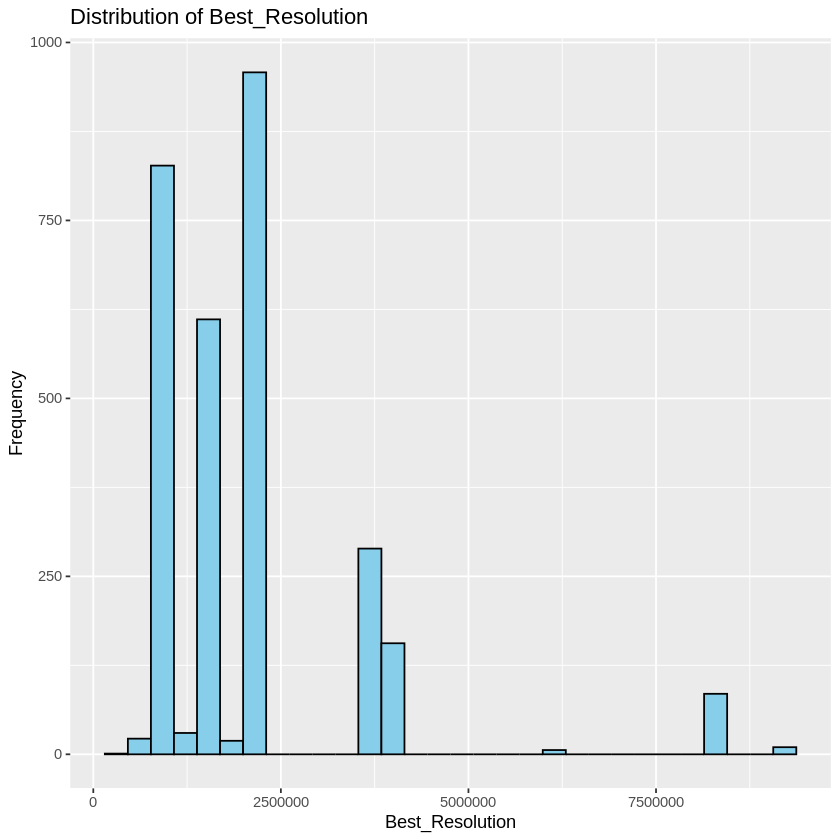

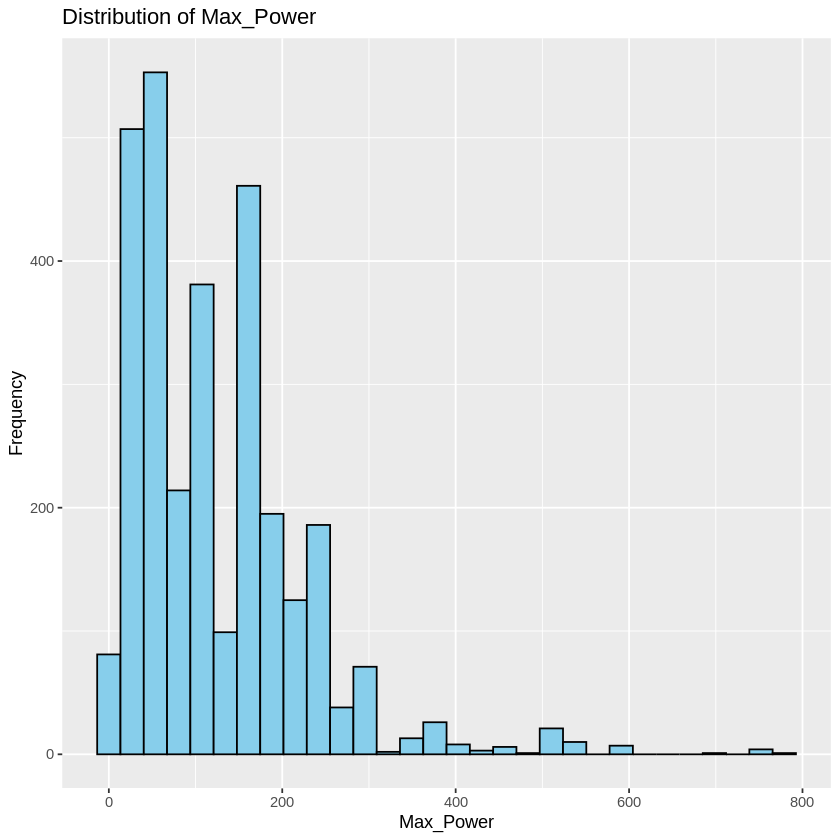

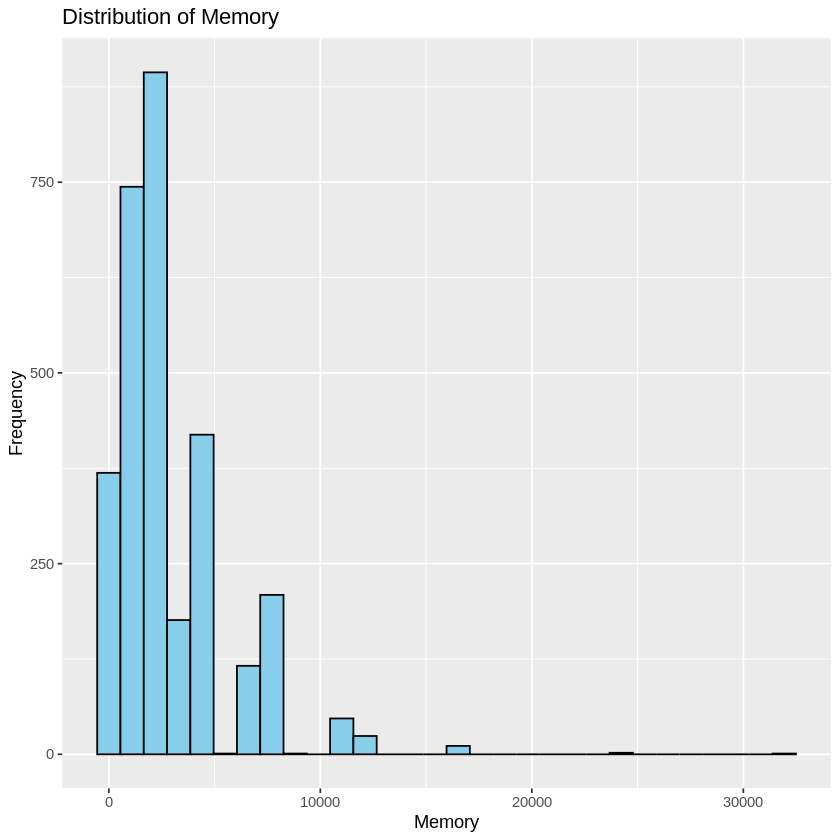

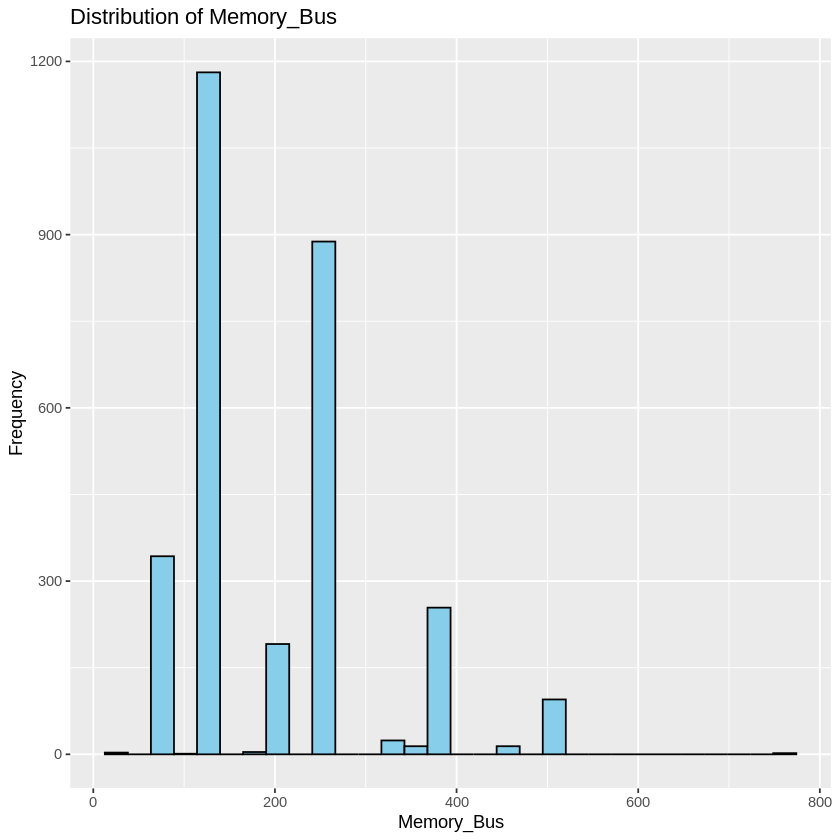

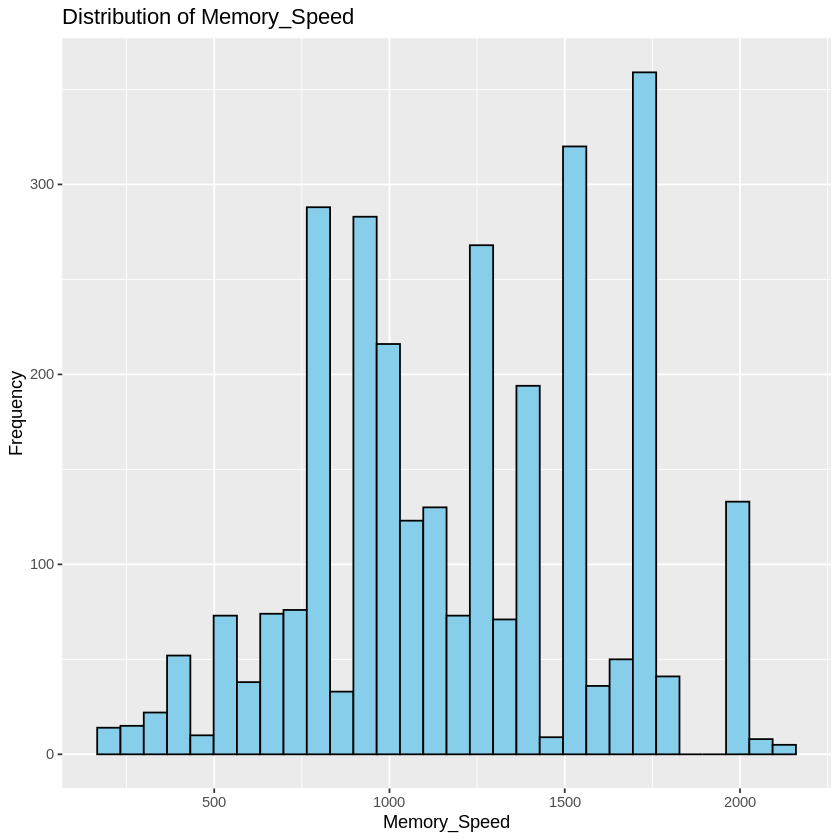

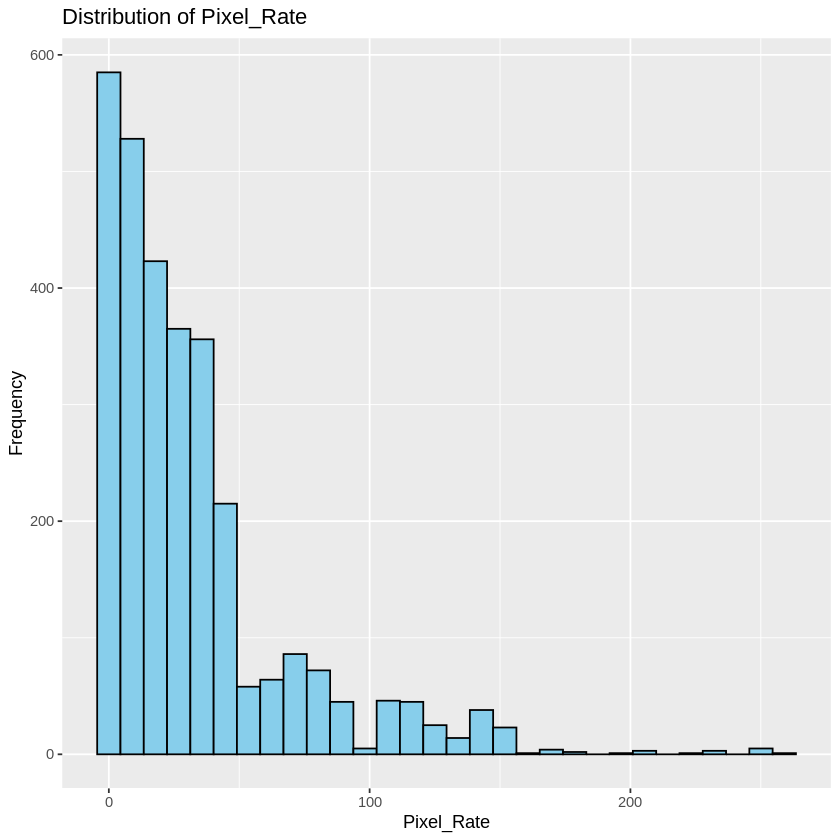

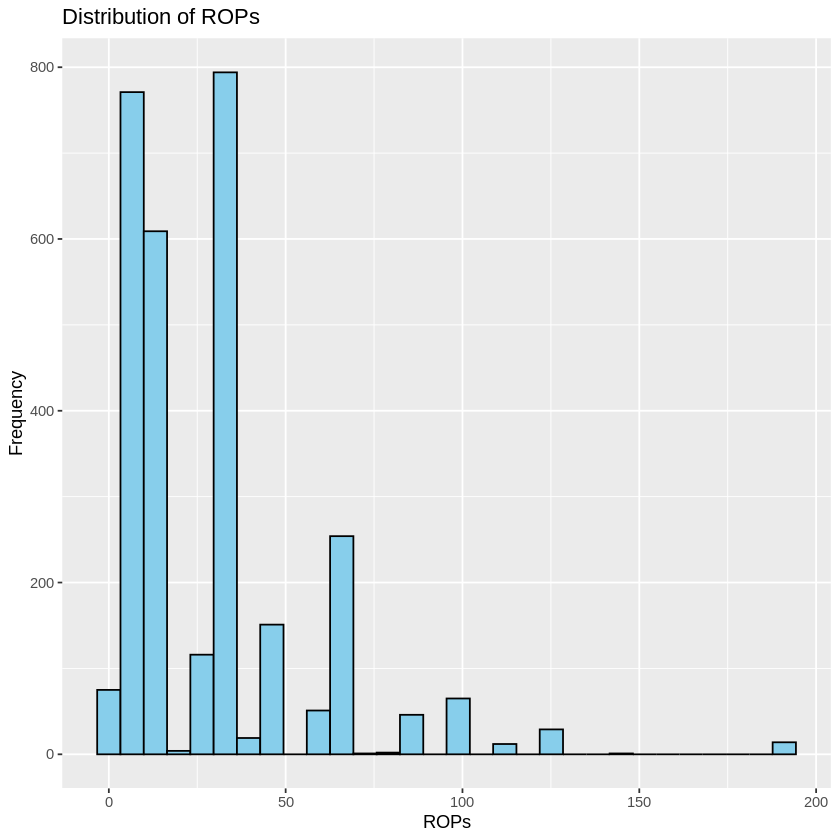

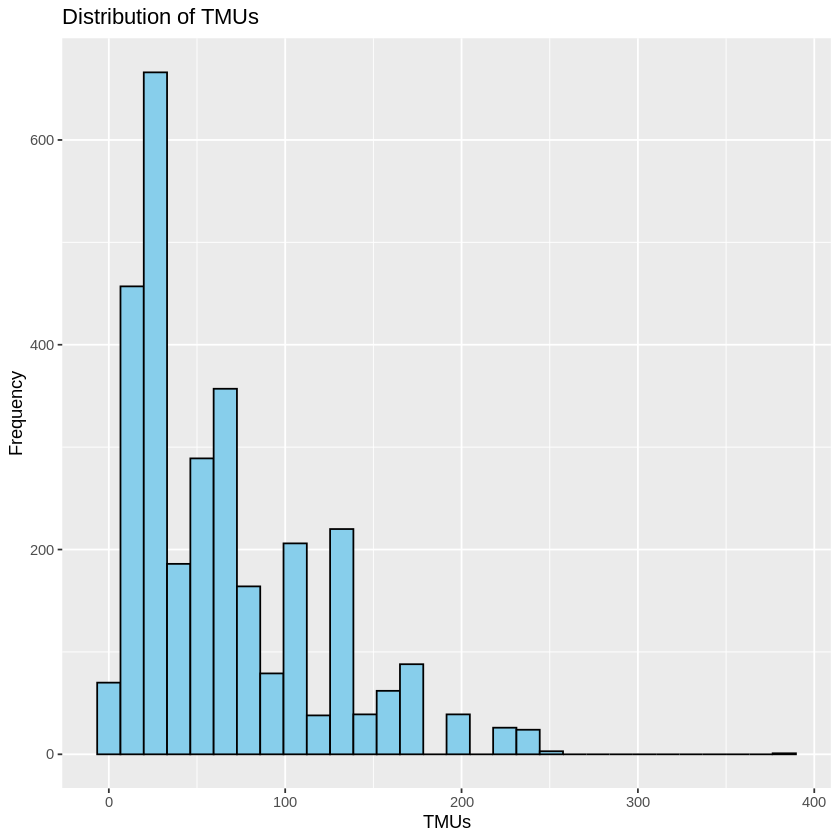

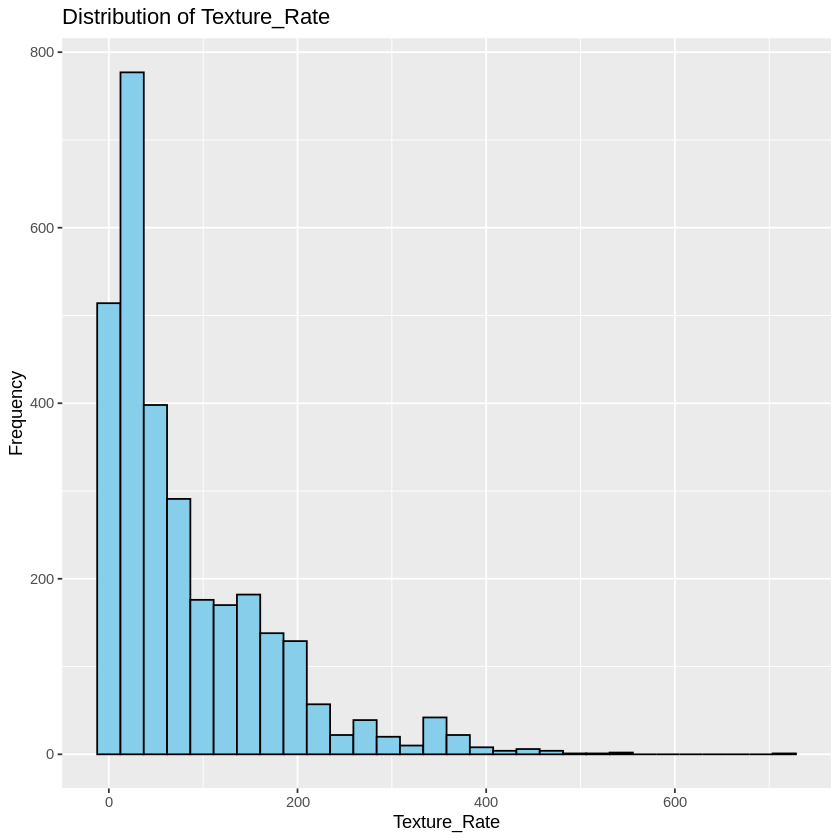

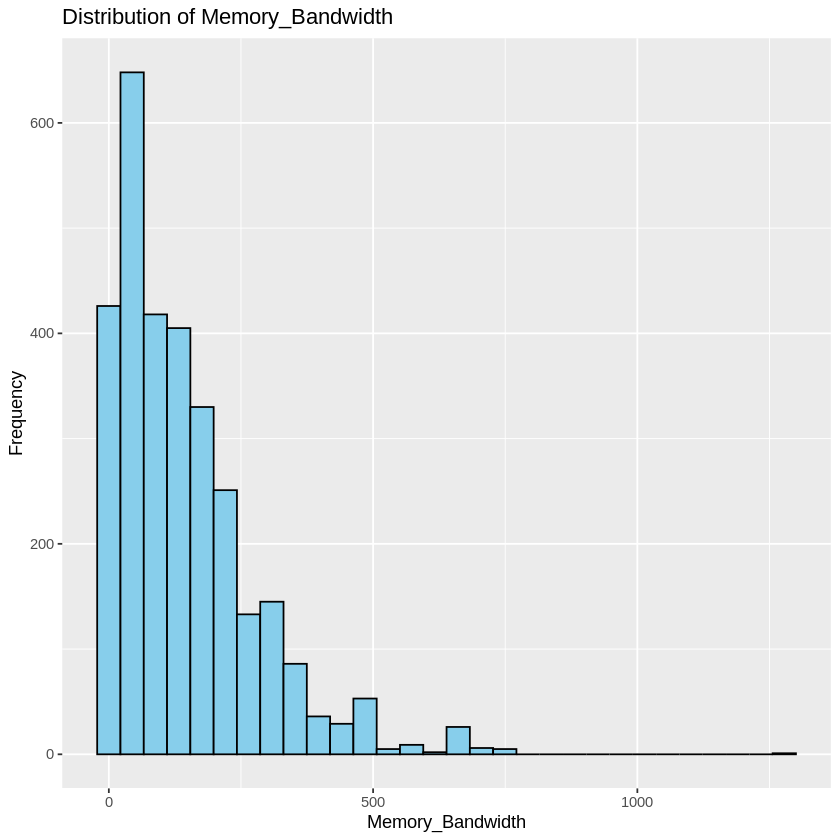

In [ ]:
# Function to draw distribution plot for specific columns
draw_distribution <- function(cleaned_dataset, bins = 30) {
  columns_to_plot <- c(
    "Best_Resolution",
    "Max_Power",
    "Memory",
    "Memory_Bus",
    "Memory_Speed",
    "Pixel_Rate",
    "ROPs",
    "TMUs",
    "Texture_Rate",
    "Memory_Bandwidth"
  )

  for (col in columns_to_plot) {
    if (is.numeric(cleaned_dataset[[col]])) {
      plot <- ggplot(cleaned_dataset, aes(x = !!rlang::sym(col))) +
        geom_histogram(bins = bins, fill = "skyblue", color = "black") +
        labs(title = paste("Distribution of", col),
             x = col, y = "Frequency")
    } else {
      plot <- ggplot(cleaned_dataset, aes(x = !!rlang::sym(col), fill = !!rlang::sym(col))) +
        geom_bar() +
        labs(title = paste("Distribution of", col),
             x = col, y = "Frequency")
    }

    print(plot)
  }
}

draw_distribution(cleaned_dataset, bins = 30)


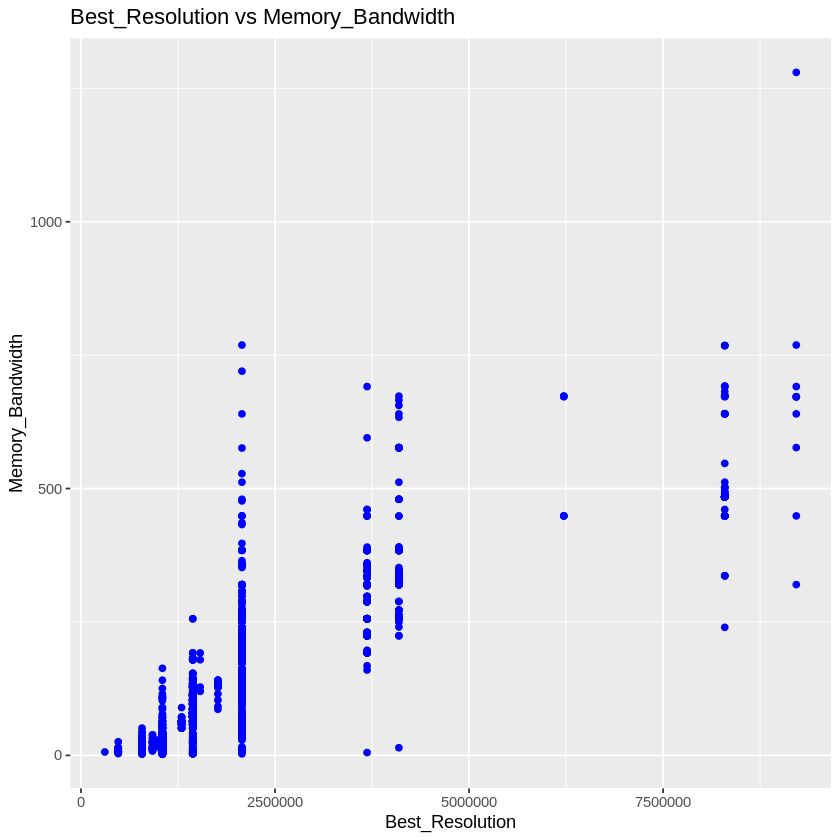

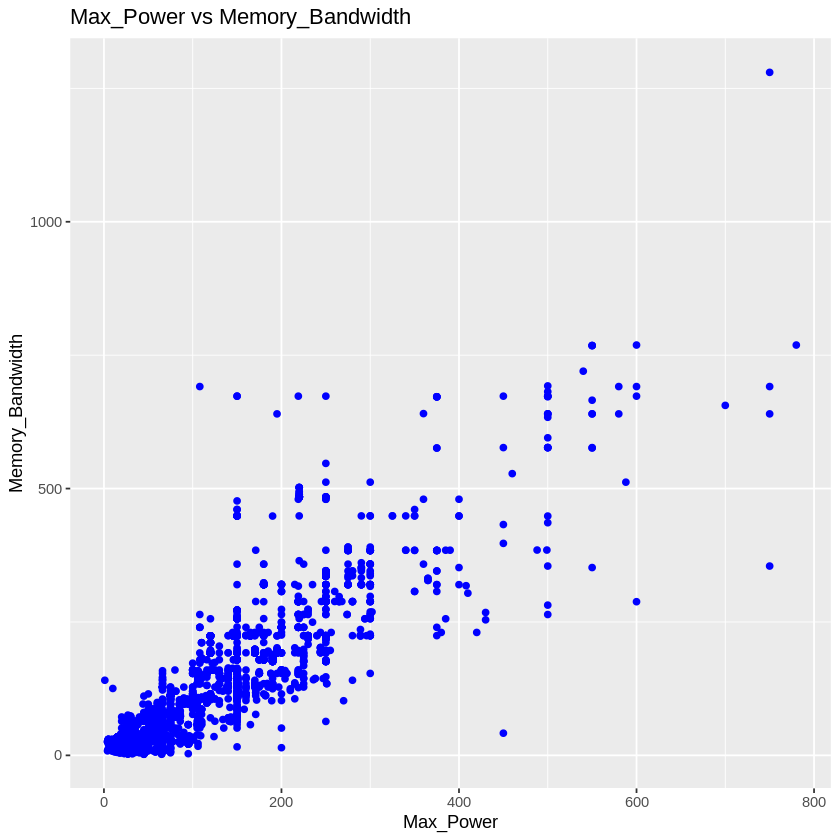

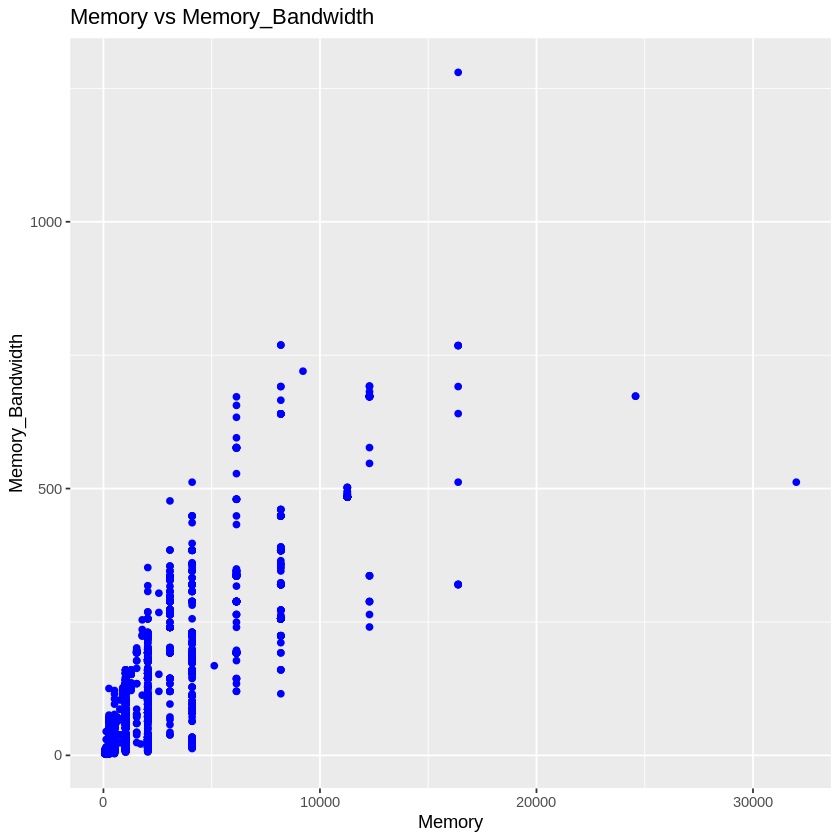

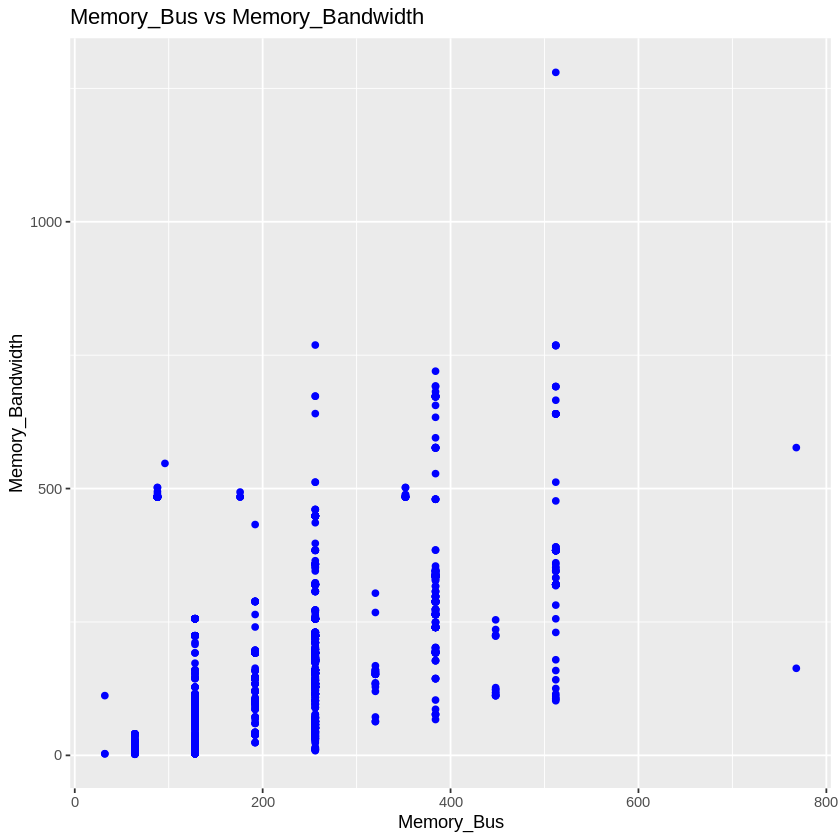

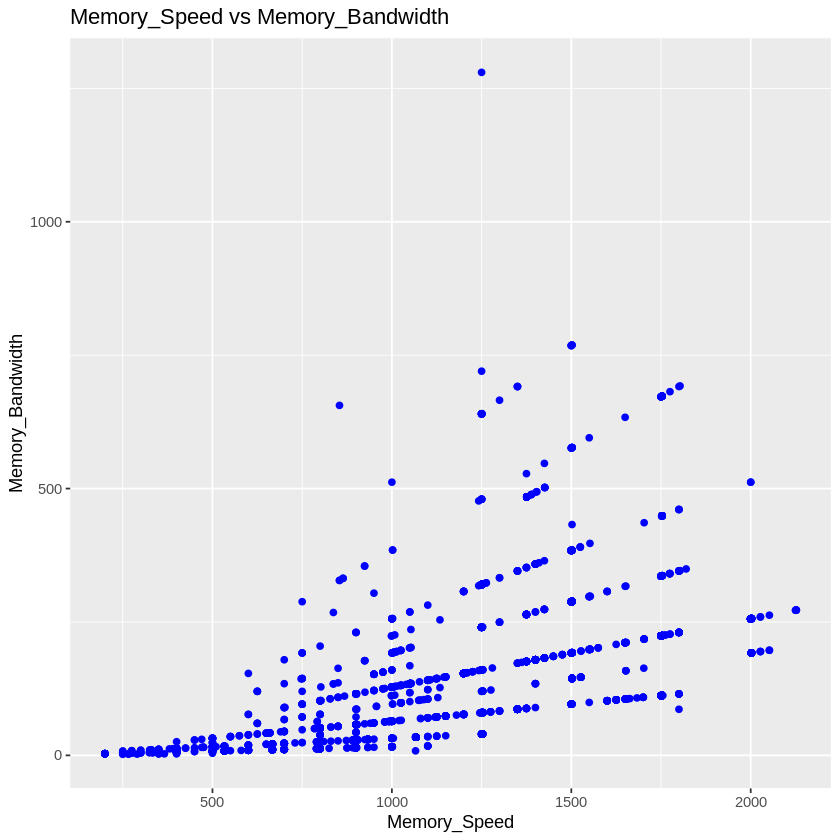

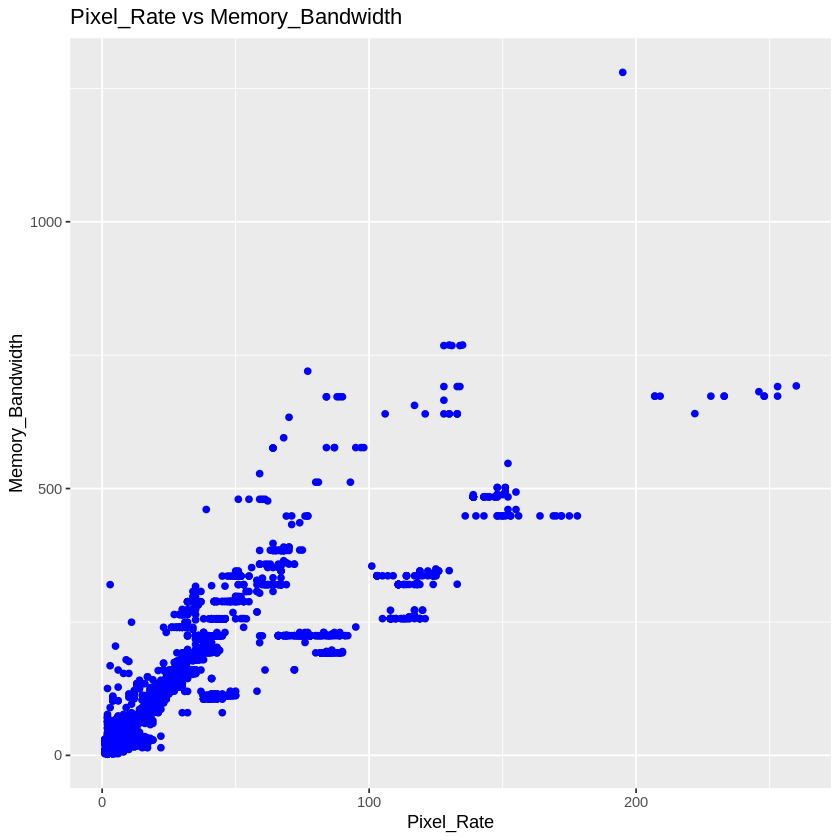

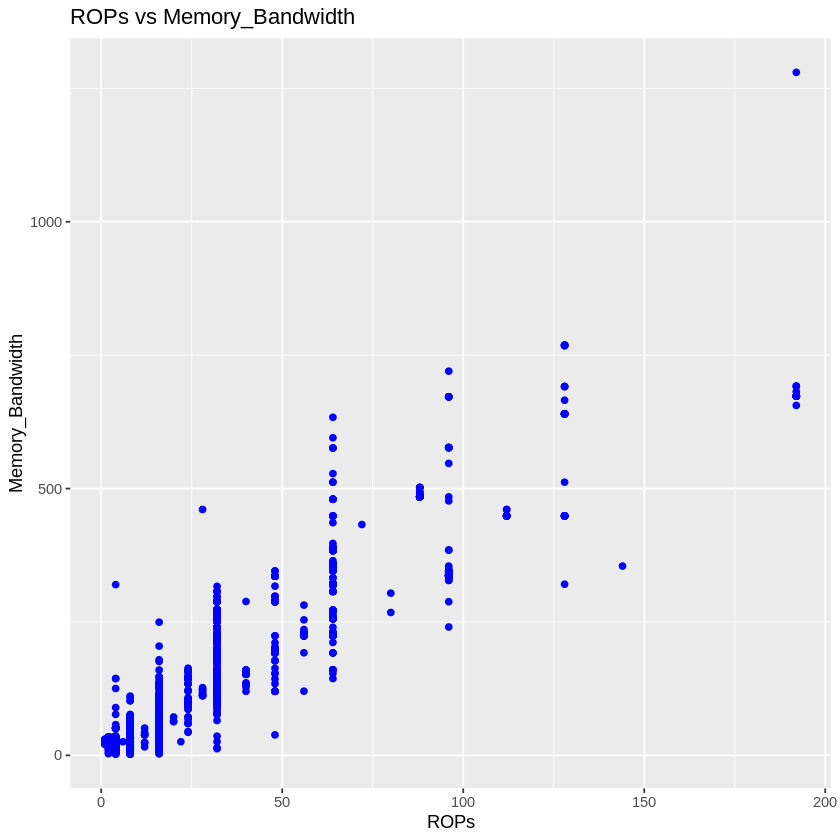

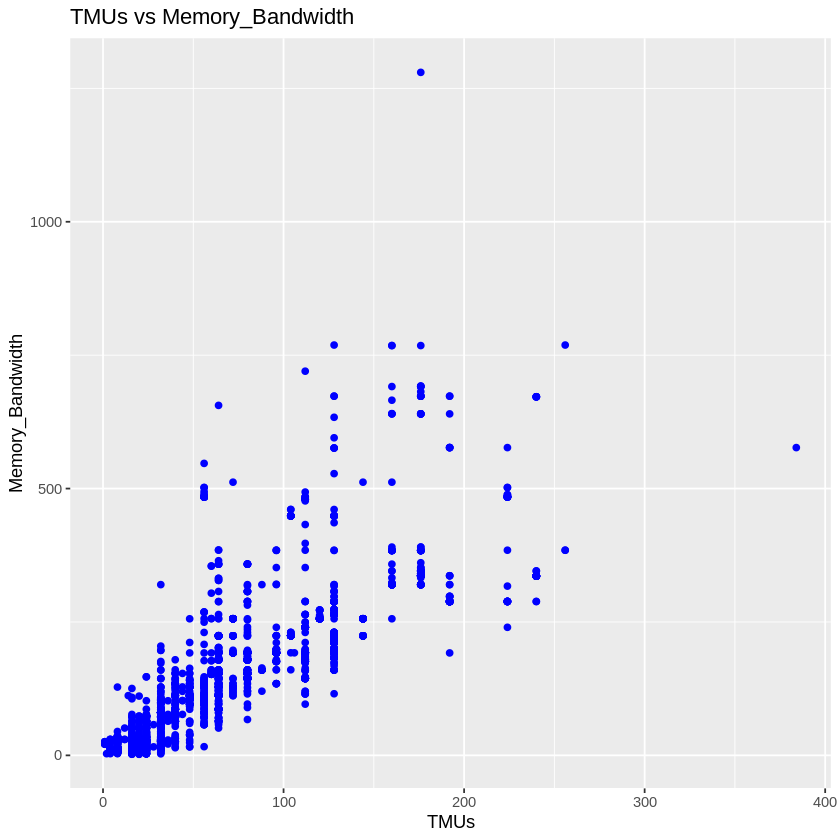

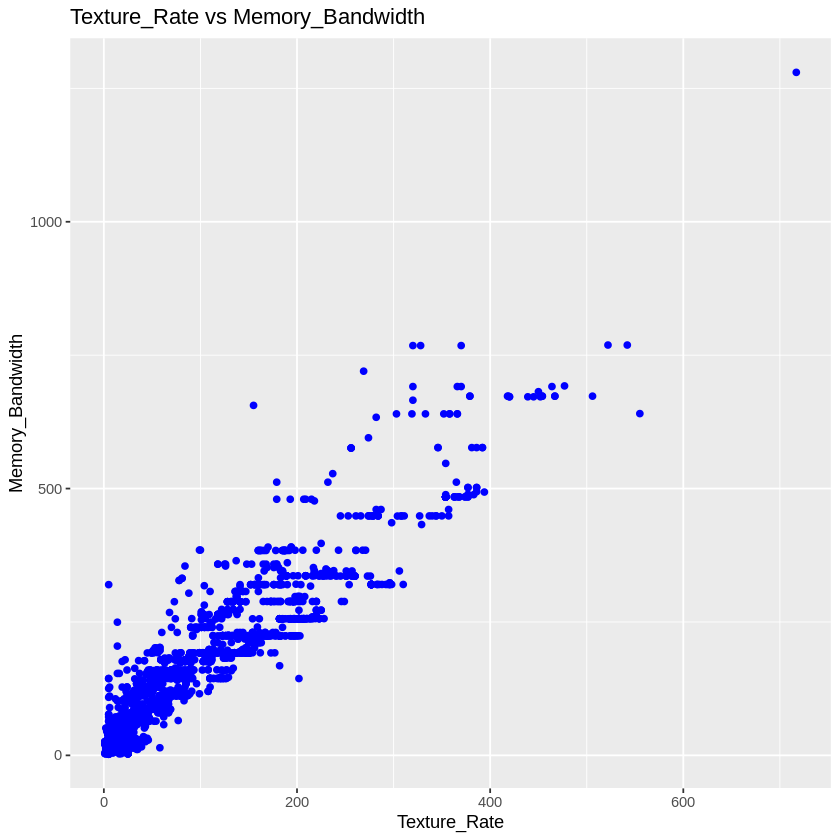

In [ ]:
draw_scatter_plot <- function(cleaned_dataset) {
  columns_to_plot <- c(
    "Best_Resolution",
    "Max_Power",
    "Memory",
    "Memory_Bus",
    "Memory_Speed",
    "Pixel_Rate",
    "ROPs",
    "TMUs",
    "Texture_Rate"
  )

  for (col in columns_to_plot) {
    plot <- ggplot(cleaned_dataset, aes(x = !!rlang::sym(col), y = Memory_Bandwidth)) +
      geom_point(color = "blue") +
      labs(title = paste(col, "vs Memory_Bandwidth"),
           x = col, y = "Memory_Bandwidth")

    print(plot)
  }
}

draw_scatter_plot(cleaned_dataset)


In [ ]:
#############Inferential Statistics###############

In [ ]:
# Load the dataset into R
cleaned_dataset <- read.csv("cleaned_dataset.csv")

In [ ]:
# Selecting only the specified columns
data_inferential <- cleaned_dataset[, c("Best_Resolution", "Max_Power",
                                        "Memory", "Memory_Bus", "Memory_Speed", "Pixel_Rate",
                                        "ROPs", "TMUs", "Texture_Rate", "Memory_Bandwidth")]

# Dropping outliers based on specified conditions
data_inferential <- data_inferential[data_inferential$Memory_Bandwidth <= 500, ]

# Write data_inferential to a CSV file
write.csv(data_inferential, "data_inferential.csv", row.names = FALSE)

str(data_inferential)

'data.frame':	2956 obs. of  10 variables:
 $ Best_Resolution : int  2073600 1049088 1049088 786432 786432 786432 2073600 786432 2073600 1049088 ...
 $ Max_Power       : int  141 215 200 75 45 50 190 150 150 32 ...
 $ Memory          : int  1024 512 512 256 256 256 2048 256 2048 64 ...
 $ Memory_Bus      : int  256 512 256 128 128 128 256 256 256 64 ...
 $ Memory_Speed    : int  1000 828 800 1150 700 1100 1050 800 1250 366 ...
 $ Pixel_Rate      : int  12 12 10 3 3 3 14 7 25 2 ...
 $ ROPs            : int  16 16 16 4 4 4 16 12 32 4 ...
 $ TMUs            : int  64 16 16 8 8 8 40 12 80 32 ...
 $ Texture_Rate    : int  47 12 10 7 6 6 35 7 62 2 ...
 $ Memory_Bandwidth: num  64 106 51.2 36.8 22.4 ...


In [ ]:
install.packages("multcomp")
library(multcomp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load the dataset
data_inferential <- read.csv("data_inferential.csv")

In [ ]:
# Convert Memory_Bus to a factor
data_inferential$Memory_Bus <- as.factor(data_inferential$Memory_Bus)

# Perform ANOVA for Memory_Bandwidth
anova_result_memory_bus <- aov(Memory_Bandwidth ~ Memory_Bus, data = data_inferential)

# Print the ANOVA summary for Memory_Bus
print("ANOVA Summary for Memory_Bus")
print(summary(anova_result_memory_bus))

[1] "ANOVA Summary for Memory_Bus"
              Df   Sum Sq Mean Sq F value Pr(>F)    
Memory_Bus    12 25056819 2088068   483.8 <2e-16 ***
Residuals   2943 12701049    4316                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "QQ Plot for Residuals of Memory_Bus"


[1] 2088 2457

[1] "Shapiro-Wilk Test for Normality - Memory_Bus"

	Shapiro-Wilk normality test

data:  residuals(anova_result_memory_bus)
W = 0.91755, p-value < 2.2e-16

[1] "Levene's Test for Equality of Variances"
Levene's Test for Homogeneity of Variance (center = median)
        Df F value    Pr(>F)    
group   12  38.627 < 2.2e-16 ***
      2943                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


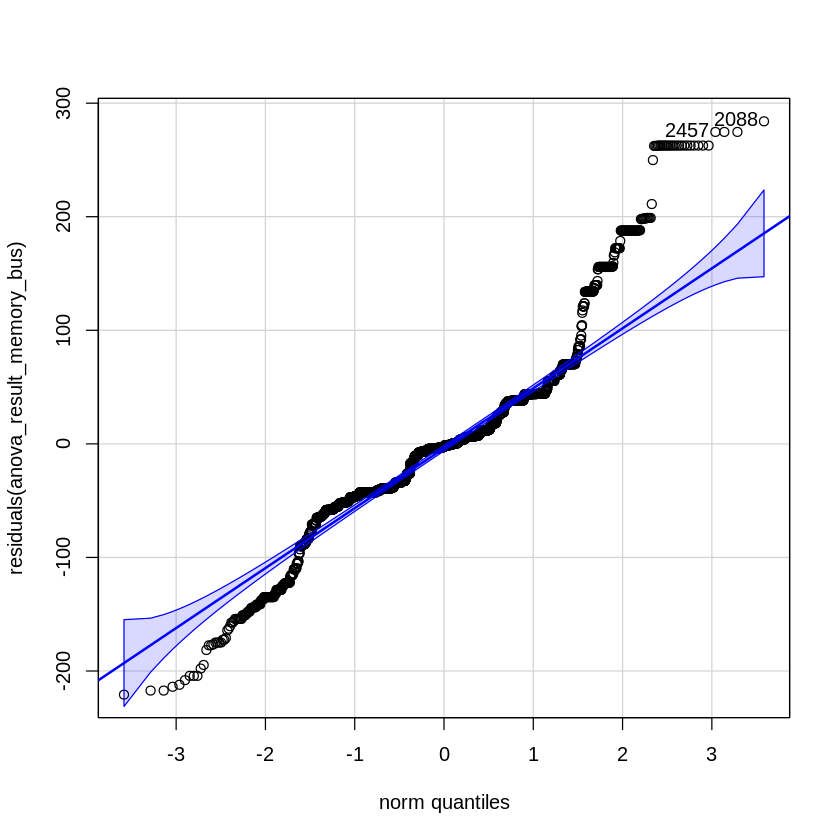

In [ ]:
# Create a QQ plot for the residuals of Memory_Bus
print("QQ Plot for Residuals of Memory_Bus")
qqPlot(residuals(anova_result_memory_bus))

# Perform Shapiro-Wilk test for normality on residuals of Memory_Bus
shapiro_test_memory_bus <- shapiro.test(residuals(anova_result_memory_bus))

# Print the result of the Shapiro-Wilk test
print("Shapiro-Wilk Test for Normality - Memory_Bus")
print(shapiro_test_memory_bus)

# Perform Levene's test for equality of variances
levene_test <- leveneTest(Memory_Bandwidth ~ Memory_Bus, data = data_inferential)

# Print the result of Levene's test
print("Levene's Test for Equality of Variances")
print(levene_test)

In [ ]:
#######Bonus part for ANOVA#########
#######Since the normality and homogeneity of variances are violated in one-way ANOVA, we need to use other non - parametric test
#######to further prove our point and reject the null hypothesis. We can use the Kruskal - Wallis test


In [ ]:
#Read data
data <- read.csv("data_inferential.csv")
# Ensure Memory_Bus is a factor
data_inferential$Memory_Bus <- as.factor(data_inferential$Memory_Bus)

# Perform Kruskal-Wallis Test for Memory_Bandwidth
kruskal_result_memory_bus <- kruskal.test(Memory_Bandwidth ~ Memory_Bus, data = data_inferential)

# Print the Kruskal-Wallis Test summary for Memory_Bus
print("Kruskal-Wallis Test Summary for Memory_Bus")
print(kruskal_result_memory_bus)


[1] "Kruskal-Wallis Test Summary for Memory_Bus"

	Kruskal-Wallis rank sum test

data:  Memory_Bandwidth by Memory_Bus
Kruskal-Wallis chi-squared = 1972.4, df = 12, p-value < 2.2e-16



In [ ]:
install.packages("dunn.test")
library(dunn.test)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Perform Dunn test
dunn_result_memory_bus <- dunn.test(data_inferential$Memory_Bandwidth, g = data_inferential$Memory_Bus, method = "bonferroni")

# Print the Dunn Test summary
print("Dunn Test Summary for Memory_Bus")
print(dunn_result_memory_bus)

  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 1972.4326, df = 12, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |        128        176        192        256         32        320
---------+------------------------------------------------------------------
     176 |  -4.483221
         |    0.0003*
         |
     192 |  -11.38356   2.687220
         |    0.0000*     0.2810
         |
     256 |  -25.64622   2.203143  -3.176850
         |    0.0000*     1.0000     0.0581
         |
      32 |   1.040199   3.727239   2.559210   3.013253
         |     1.0000    0.0075*     0.4092     0.1008
         |
     320 |  -4.455407   2.456669  -0.142463   1.076388  -2.482104
         |    0.0003*     0.5469     1.0000     1.0000     0.5094
         |
     352 |  -7.729832   0.004651  -4.552743  -3.789604  -4.405968  

In [ ]:
######Linear regression######

In [ ]:
# Load the dataset
data_inferential <- read.csv("data_inferential.csv")

#Perform multiple linear regression
multiple_lm <- lm(Memory_Bandwidth ~ Best_Resolution + Max_Power + Memory + Memory_Bus + Memory_Speed + Pixel_Rate + ROPs + TMUs + Texture_Rate, data = data_inferential)

# Print the summary of the regression model
summary(multiple_lm)



Call:
lm(formula = Memory_Bandwidth ~ Best_Resolution + Max_Power + 
    Memory + Memory_Bus + Memory_Speed + Pixel_Rate + ROPs + 
    TMUs + Texture_Rate, data = data_inferential)

Residuals:
     Min       1Q   Median       3Q      Max 
-238.455  -11.579    0.664   11.825  126.418 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -5.672e+01  1.870e+00 -30.332  < 2e-16 ***
Best_Resolution  5.611e-06  7.515e-07   7.467 1.07e-13 ***
Max_Power        1.894e-01  1.008e-02  18.796  < 2e-16 ***
Memory           1.517e-03  3.255e-04   4.659 3.31e-06 ***
Memory_Bus       2.715e-01  8.094e-03  33.546  < 2e-16 ***
Memory_Speed     3.192e-02  1.504e-03  21.223  < 2e-16 ***
Pixel_Rate      -1.009e+00  5.730e-02 -17.611  < 2e-16 ***
ROPs             1.581e+00  7.223e-02  21.884  < 2e-16 ***
TMUs            -5.529e-01  2.271e-02 -24.344  < 2e-16 ***
Texture_Rate     1.057e+00  2.066e-02  51.162  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.

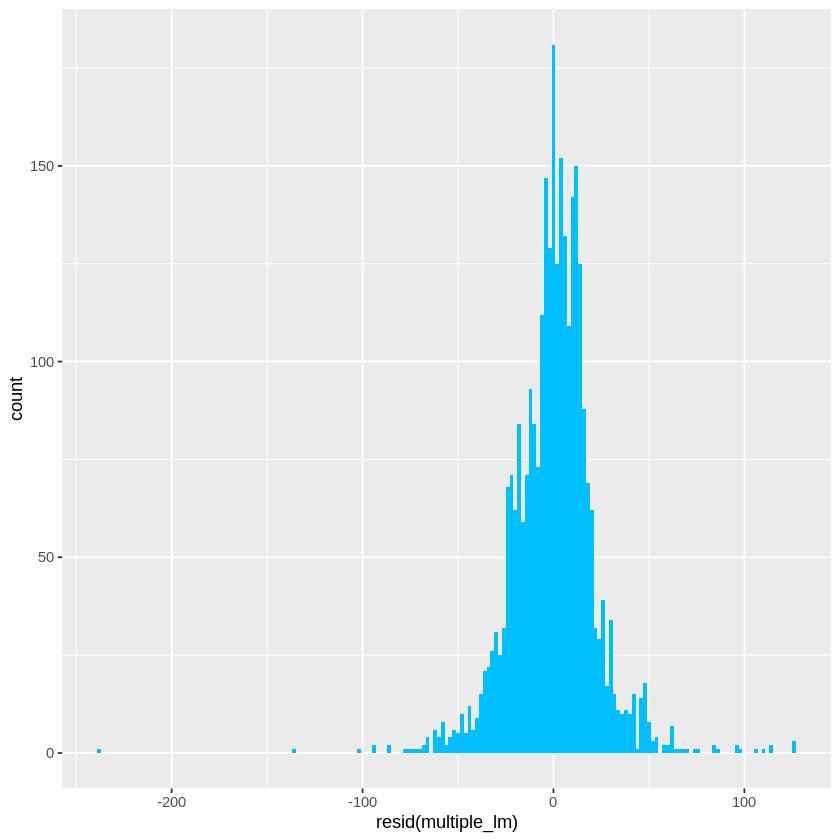

In [ ]:
ggplot(multiple_lm, aes(x = resid(multiple_lm))) +
geom_histogram(binwidth = 2, fill = "deepskyblue") # histogram of residuals

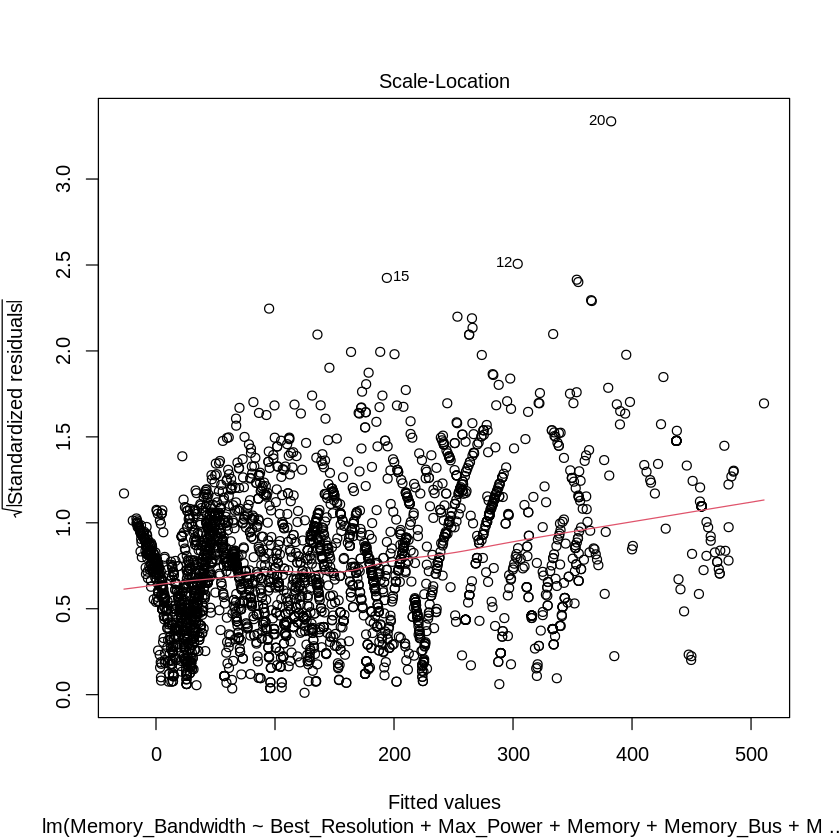

In [ ]:
plot(multiple_lm, which = 3)

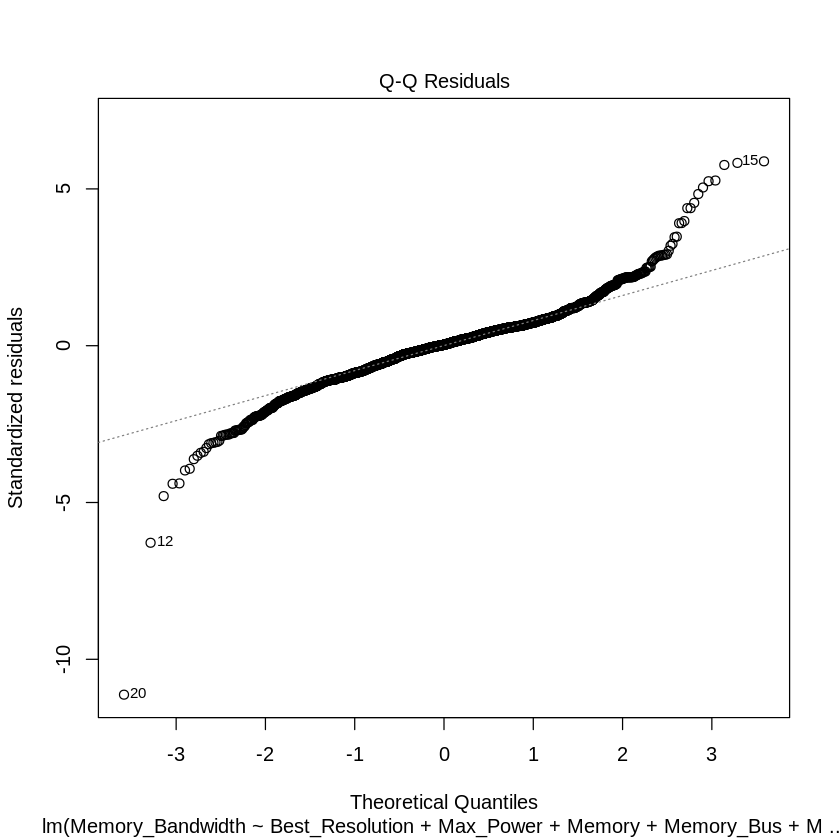

In [ ]:
plot(multiple_lm, which = 2)

In [ ]:
# Load the dataset
data_inferential <- read.csv("data_inferential.csv")

#Perform multiple linear regression
multiple_lm <- lm(Memory_Bandwidth ~ Memory_Bus + Memory_Speed + Texture_Rate, data = data_inferential)

# Print the summary of the regression model
summary(multiple_lm)


Call:
lm(formula = Memory_Bandwidth ~ Memory_Bus + Memory_Speed + Texture_Rate, 
    data = data_inferential)

Residuals:
     Min       1Q   Median       3Q      Max 
-175.465  -15.452    0.166   12.922  177.462 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -32.099094   2.035681 -15.768   <2e-16 ***
Memory_Bus     0.316368   0.006055  52.247   <2e-16 ***
Memory_Speed   0.015835   0.001802   8.786   <2e-16 ***
Texture_Rate   1.080210   0.010567 102.220   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.76 on 2952 degrees of freedom
Multiple R-squared:  0.9307,	Adjusted R-squared:  0.9307 
F-statistic: 1.322e+04 on 3 and 2952 DF,  p-value: < 2.2e-16


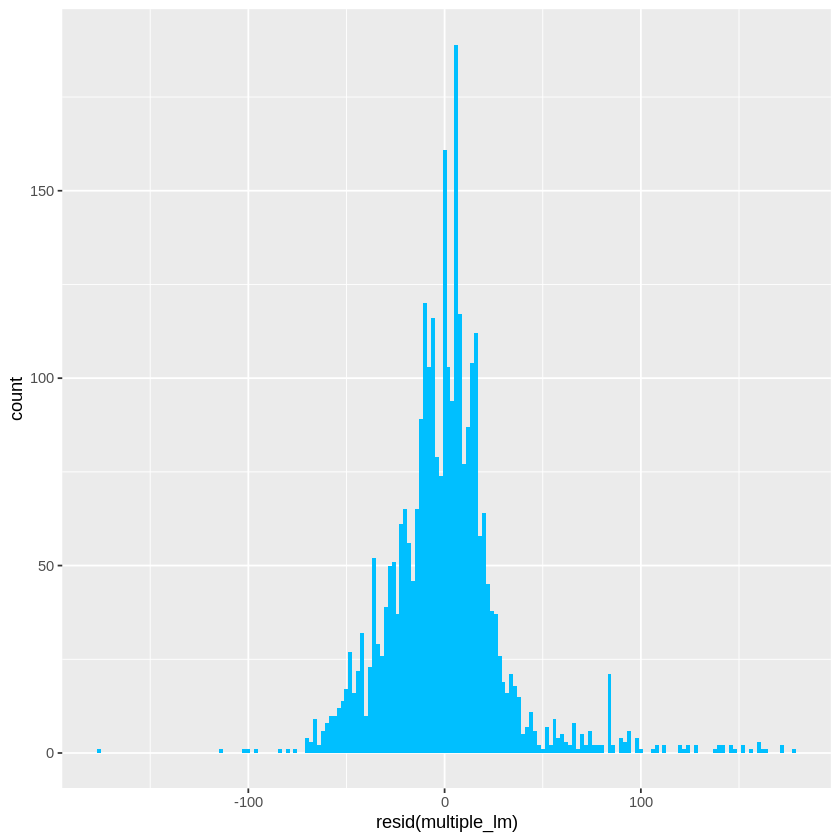

In [ ]:
ggplot(multiple_lm, aes(x = resid(multiple_lm))) +
geom_histogram(binwidth = 2, fill = "deepskyblue") # histogram of residuals

In [ ]:
# Load the dataset
data_inferential <- read.csv("data_inferential.csv")

# Perform multiple linear regression
multiple_lm <- lm(Memory_Bandwidth ~ Memory_Bus + Memory_Speed + Texture_Rate, data = data_inferential)

# Calculate residuals
residuals_values <- residuals(multiple_lm)

# Define indices for outliers
outlier_indices <- which(residuals_values > 50 | residuals_values < -50)

# Remove outliers from the dataset
data_cleaned <- data_inferential[-outlier_indices, ]

# Refit the model with the cleaned data
multiple_lm_cleaned <- lm(Memory_Bandwidth ~ Memory_Bus + Memory_Speed + Texture_Rate, data = data_cleaned)

# Print the summary of the cleaned regression model
summary(multiple_lm_cleaned)

# Calculate and print the number of observations removed and remaining
num_removed <- length(outlier_indices)
num_remaining <- nrow(data_cleaned)

cat("Number of outliers removed:", num_removed, "\n")
cat("Remaining number of observations after removing outliers:", num_remaining, "\n")



Call:
lm(formula = Memory_Bandwidth ~ Memory_Bus + Memory_Speed + Texture_Rate, 
    data = data_cleaned)

Residuals:
    Min      1Q  Median      3Q     Max 
-64.738 -11.809   0.407  12.575  93.471 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -48.653420   1.419153  -34.28   <2e-16 ***
Memory_Bus     0.357705   0.004456   80.28   <2e-16 ***
Memory_Speed   0.030411   0.001264   24.06   <2e-16 ***
Texture_Rate   0.922263   0.009063  101.76   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.46 on 2729 degrees of freedom
Multiple R-squared:  0.9658,	Adjusted R-squared:  0.9657 
F-statistic: 2.566e+04 on 3 and 2729 DF,  p-value: < 2.2e-16


Number of outliers removed: 223 
Remaining number of observations after removing outliers: 2733 


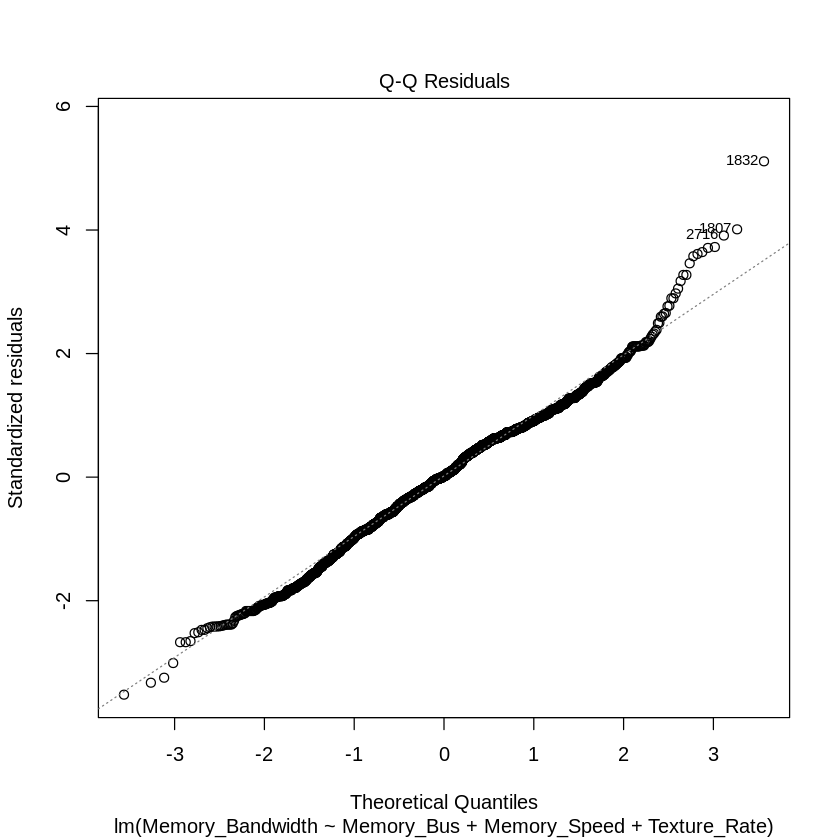

In [ ]:
plot(multiple_lm_cleaned, which = 2)

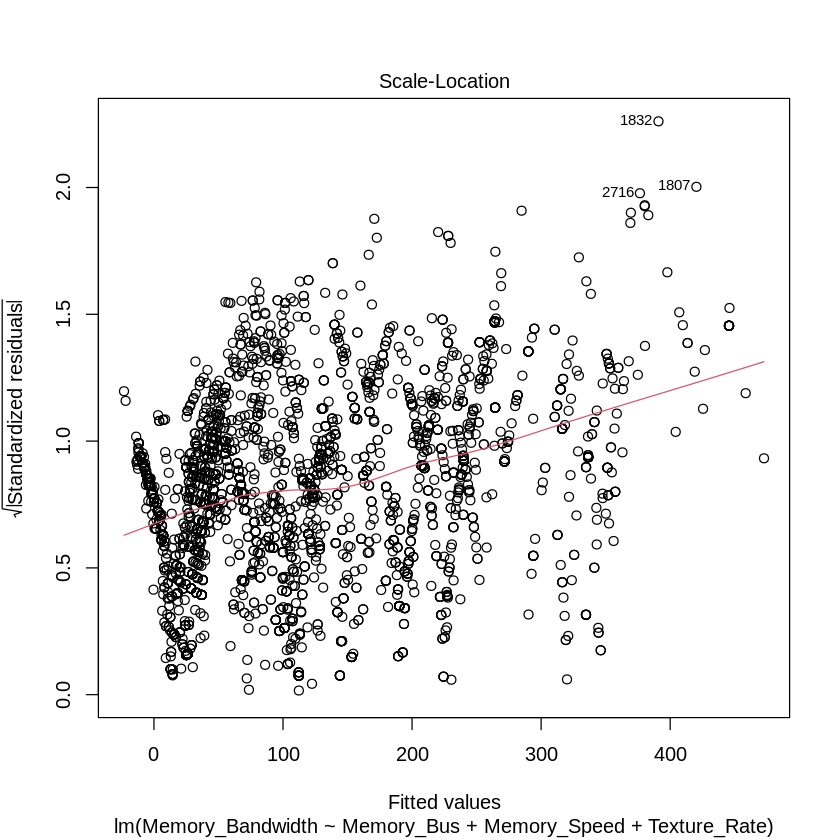

In [ ]:
plot(multiple_lm_cleaned, which = 3)

`geom_smooth()` using formula = 'y ~ x'


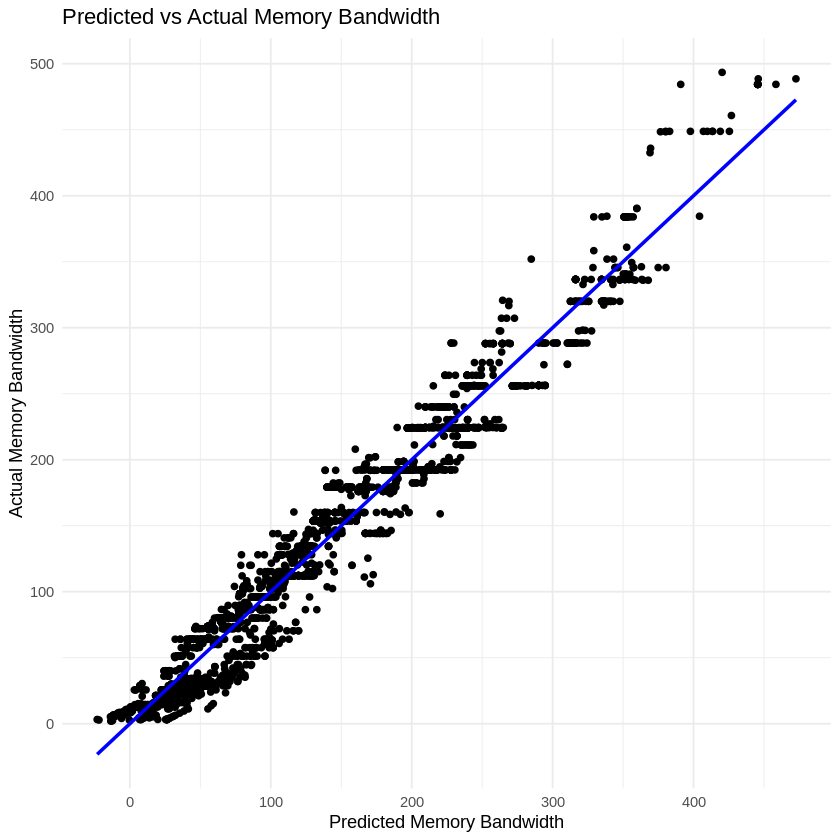

In [ ]:
# Predict values using the cleaned model
predicted_values <- predict(multiple_lm_cleaned, newdata = data_cleaned)

# Create a data frame with predicted values and actual Memory_Bandwidth values
predictions_df <- data.frame(Predicted = predicted_values, Actual = data_cleaned$Memory_Bandwidth)

# Plot predicted vs actual values
ggplot(predictions_df, aes(x = Predicted, y = Actual)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(x = "Predicted Memory Bandwidth", y = "Actual Memory Bandwidth", title = "Predicted vs Actual Memory Bandwidth") +
  theme_minimal()

In [ ]:
# Obtain the summary of the cleaned regression model
summary_lm_cleaned <- summary(multiple_lm_cleaned)

# Extract the residual standard error (RSE) from the summary output
RSE <- summary_lm_cleaned$sigma

# Print the RSE value
cat("Residual Standard Error (RSE):", RSE, "\n")


Residual Standard Error (RSE): 18.46435 


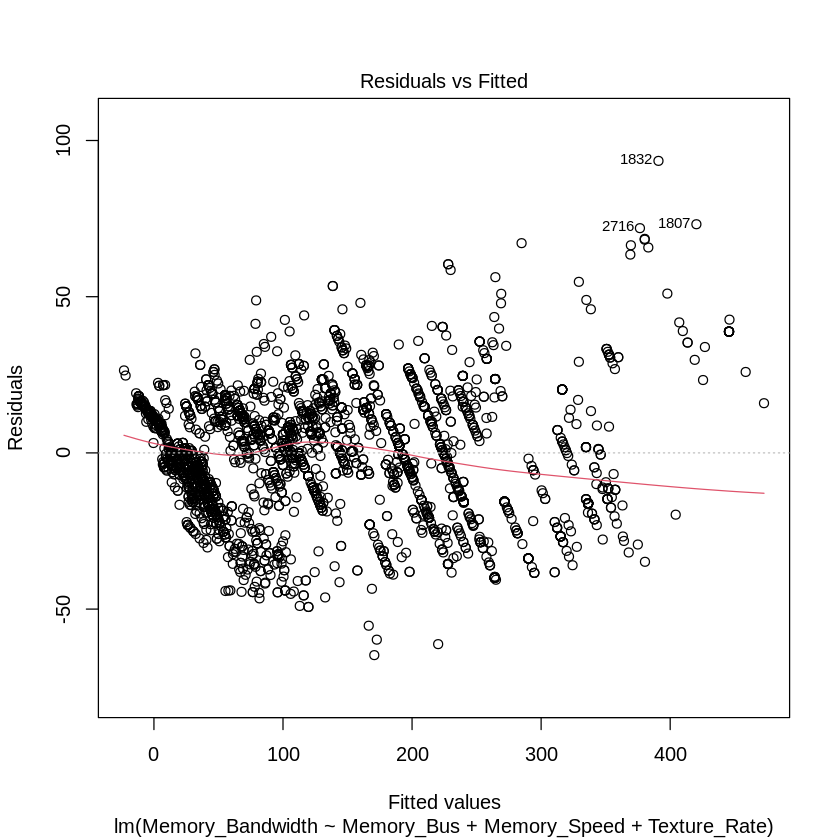

In [ ]:
# Residuals vs. Fitted Values Plot
plot(multiple_lm_cleaned, which = 1)  # 1 corresponds to residuals vs. fitted

In [ ]:
#####End of Inferential part#########

In [ ]:
###########Further research and another model##############

In [ ]:
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
 # Load the dataset
data_inferential <- read.csv("data_inferential.csv")
 # Build model
 model.rfr <- randomForest(formula = Memory_Bandwidth ~ Best_Resolution + Max_Power + Memory + Memory_Bus + Memory_Speed + Pixel_Rate + ROPs + TMUs + Texture_Rate, data = data_inferential, ntree = 100)
 # Print model's information
 print(model.rfr)


Call:
 randomForest(formula = Memory_Bandwidth ~ Best_Resolution + Max_Power +      Memory + Memory_Bus + Memory_Speed + Pixel_Rate + ROPs +      TMUs + Texture_Rate, data = data_inferential, ntree = 100) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 3

          Mean of squared residuals: 152.9333
                    % Var explained: 98.8


In [ ]:
 # Create data frame for real Memory_Bandwidth value and predicted Memory_Bandwidth value
 comtab.rfr <- data_inferential['Memory_Bandwidth']
 comtab.rfr['Memory_Bandwidth_predicted'] <- as.data.frame(predict(model.rfr, newdata = data_inferential), row.names = NULL)

 # Evaluate model performance
  accuracy <- sum(1-abs(comtab.rfr$Memory_Bandwidth_predicted- comtab.rfr$Memory_Bandwidth) / comtab.rfr$Memory_Bandwidth) / nrow(comtab.rfr)
  MAE <- sum(abs(comtab.rfr$Memory_Bandwidth_predicted- comtab.rfr$Memory_Bandwidth)) / nrow(comtab.rfr)

  print(paste("Accuracy:", accuracy))
  print(paste("MAE:", MAE))

[1] "Accuracy: 0.967484260325928"
[1] "MAE: 1.94952519484957"


In [ ]:
 # calculate R-squared on testing data
 r2_test <- cor(comtab.rfr$Memory_Bandwidth, comtab.rfr$Memory_Bandwidth_predicted)^2
 print(r2_test)

[1] 0.9977128
